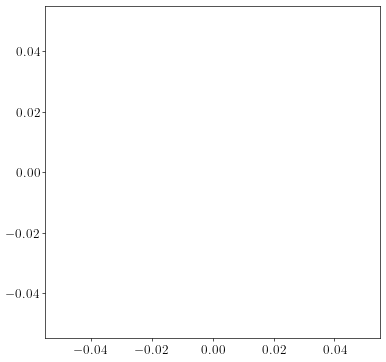

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
import json
from utils import CobbDouglasIC, CobbDouglasConsumer, PerfectSubstitutes, Leontieff, QuasilinearCE
from utils import cbeq, polyeq, term, is_divisible, Number
from matplotlib import pyplot as plt

plt.plot()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

JSON_FILE = "../assets/data/wk07_practice.json"
IMAGE_PATH = "../assets/images/wk07"
probs = []
nprob = 0

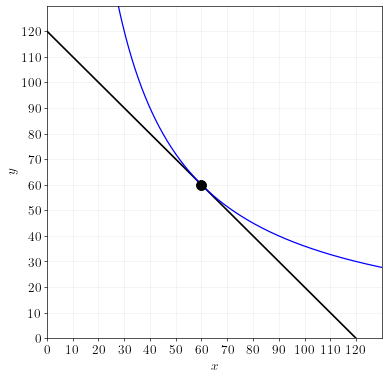

True

In [2]:
prob = CobbDouglasConsumer()
prob.graph_schematic(show=True)

In [3]:
# Cobb Douglas Consumer Numerical
df = pd.read_csv("CobbDouglasConsumer_examples.csv")
mydf = pd.concat([
    df.loc[ (df['dx']==2) ].sample(20),
    df.loc[ (df['dx']>2) ].sample(20)
]).reset_index(drop=True)
    
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = CobbDouglasConsumer(params)
    xopt = prob.sol['x']
    yopt = prob.sol['y']
    setup = prob.setup()
    setup += fr"""
<p>Solve for the optimal consumption bundle of \(x\) and \(y\).</p>
"""
    solution = fr"""
$$ x^* = {xopt:g} $$

$$ y^* = {yopt:g} $$
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

40


In [4]:
# Cobb Douglas Consumer Graphical
df = pd.read_csv("CobbDouglasConsumer_examples.csv")
mydf = pd.concat([
    df.loc[ (df['dx']==2) ].sample(10),
    df.loc[ (df['dx']>2) ].sample(10)
]).reset_index(drop=True)
    
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    nx, dx, ny, dy, I, px, py, gmax = params['nx'], params['dx'], params['ny'], params['dy'], params['I'], params['px'], params['py'], params['gmax']
    prob = CobbDouglasConsumer(params)
    xopt = prob.sol['x']
    yopt = prob.sol['y']
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(with_solution=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(with_solution=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>A consumer with income \(I = {I:g}\) has a utility function over two goods, \(x\) and \(y\), 
represented by the indifference curves below:</p>

<img src="/CSUN-Econ-310/assets/images/wk07/{setup_filename}">

<p>The price of good \(x\) is \(p_x = {px:g}\) and the price of good \(y\) is \(p_y = {py:g}\).</p>

<p>1. Draw the budget constraint.</p>
<p>2. What is the optimal choice of \(x\) and \(y\)?</p>
"""
    solution = fr"""
$$ x^* = {xopt:g} $$

$$ y^* = {yopt:g} $$

<img src="/CSUN-Econ-310/assets/images/wk07/{solution_filename}">
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

60


In [5]:
# Perfect Substitutes Graphical
df = pd.read_csv("PerfectSubstitutes_examples.csv")
mydf = df.sample(20)
    
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    I,a,b,px,py,gmax = params['I'], params['a'], params['b'], params['px'], params['py'], params['gmax']
    prob = PerfectSubstitutes(params)
    xopt = prob.sol['x']
    yopt = prob.sol['y']
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(with_solution=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(with_solution=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>A consumer with income \(I = {I:g}\) has a utility function over two goods, \(x\) and \(y\), 
represented by the indifference curves below:</p>

<img src="/CSUN-Econ-310/assets/images/wk07/{setup_filename}">

<p>The price of good \(x\) is \(p_x = {px:g}\) and the price of good \(y\) is \(p_y = {py:g}\).</p>

<p>1. Draw the budget constraint.</p>
<p>2. What is the optimal choice of \(x\) and \(y\)?</p>
"""
    solution = fr"""
$$ x^* = {xopt:g} $$

$$ y^* = {yopt:g} $$

<img src="/CSUN-Econ-310/assets/images/wk07/{solution_filename}">
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

FileNotFoundError: [Errno 2] No such file or directory: 'PerfectSubstitutes_examples.csv'

In [ ]:
# Leontieff Graphical
df = pd.read_csv("Leontieff_examples.csv")
mydf = df.sample(10)
    
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    I,px,py,gmax = params['I'], params['px'], params['py'], params['gmax']
    prob = Leontieff(params)
    xopt = prob.sol['x']
    yopt = prob.sol['y']
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(with_solution=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(with_solution=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>A consumer with income \(I = {I:g}\) has a utility function over two goods, \(x\) and \(y\), 
represented by the indifference curves below:</p>

<img src="/CSUN-Econ-310/assets/images/wk07/{setup_filename}">

<p>The price of good \(x\) is \(p_x = {px:g}\) and the price of good \(y\) is \(p_y = {py:g}\).</p>

<p>1. Draw the budget constraint.</p>
<p>2. What is the optimal choice of \(x\) and \(y\)?</p>
"""
    solution = fr"""
$$ x^* = {xopt:g} $$

$$ y^* = {yopt:g} $$

<img src="/CSUN-Econ-310/assets/images/wk07/{solution_filename}">
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

In [ ]:
# Quasilinear Consumer Numerical
df = pd.read_csv("QuasilinearCE_examples.csv")
mydf = df.sample(30).reset_index(drop=True)
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = QuasilinearCE(params)
    xopt = prob.sol['x']
    yopt = prob.sol['y']
    setup = prob.setup()
    setup += fr"""
<p>Solve for the optimal consumption bundle of \(x\) and \(y\).</p>
"""
    solution = fr"""
$$ x^* = {xopt:g} $$

$$ y^* = {yopt:g} $$
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

In [ ]:
# Quasilinear Graphical
df = pd.read_csv("QuasilinearCE_examples.csv")
mydf = df.sample(20).reset_index(drop=True)
    
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    I,a,n,d,px,py,gmax,numeraire = params['I'], params['a'], params['n'], params['d'], params['px'], params['py'], params['gmax'], params['numeraire']
    prob = QuasilinearCE(params)
    xopt = prob.sol['x']
    yopt = prob.sol['y']
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(with_solution=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(with_solution=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>A consumer with income \(I = {I:g}\) has a utility function over two goods, \(x\) and \(y\), 
represented by the indifference curves below:</p>

<img src="/CSUN-Econ-310/assets/images/wk07/{setup_filename}">

<p>The price of good \(x\) is \(p_x = {px:g}\) and the price of good \(y\) is \(p_y = {py:g}\).</p>

<p>1. Draw the budget constraint.</p>
<p>2. What is the optimal choice of \(x\) and \(y\)?</p>
"""
    solution = fr"""
$$ x^* = {xopt:g} $$

$$ y^* = {yopt:g} $$

<img src="/CSUN-Econ-310/assets/images/wk07/{solution_filename}">
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

In [ ]:
with open(JSON_FILE, 'w') as f:
    json.dump(probs, f)

In [ ]:
with open(JSON_FILE, 'r') as f:
    myprobs = json.load(f)

In [ ]:
prob = np.random.choice(myprobs)
display(Latex(prob['setup']))
display(Latex(prob['solution']))

In [ ]:
len(myprobs)